<a href="https://colab.research.google.com/github/eswarpeddinti98/newproject/blob/main/06_CNN_CIFAR10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task: CIFAR-10 classification

The [CIFAR-10 dataset](https://www.cs.toronto.edu/~kriz/cifar.html)

> "consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

>The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 5000 images from each class."

<img src="http://drive.google.com/uc?export=view&id=1wlfkvZgS0oBDwxKicWmYgtsJmP3IcMdj">

# Preliminaries

In [49]:
import numpy as np
import os

import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Dropout, Conv2D, MaxPool2D, Flatten, BatchNormalization , MaxPooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adadelta, Adam, SGD
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.regularizers import l1
from tensorflow.keras.backend import clear_session
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.initializers import glorot_normal

# Fix seeds for (hopefully) reproducible results
from numpy.random import seed
seed(14)
tf.random.set_seed(19)

Download the data if necessary and load it:

In [50]:
train, test = tf.keras.datasets.cifar10.load_data()

# TODO: Split the images into different sets and normalise them
# Split the data
(train_images, train_labels), (test_images, test_labels) = train, test

# Further split training data into training and validation sets
num_validation_samples = int(0.2 * train_images.shape[0])
train_images, valid_images = train_images[:-num_validation_samples], train_images[-num_validation_samples:]
train_labels, valid_labels = train_labels[:-num_validation_samples], train_labels[-num_validation_samples:]

# Normalize pixel values to be between 0 and 1
train_images, valid_images, test_images = train_images / 255.0, valid_images / 255.0, test_images / 255.0

print(train_images.shape, valid_images.shape, test_images.shape)
print(train_labels.shape, valid_labels.shape, test_labels.shape)

(40000, 32, 32, 3) (10000, 32, 32, 3) (10000, 32, 32, 3)
(40000, 1) (10000, 1) (10000, 1)


### Categories:

- airplane
- automobile
- bird
- cat
- deer
- dog
- frog
- horse
- ship
- truck

In [51]:
# TODO: Fill in the classes
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

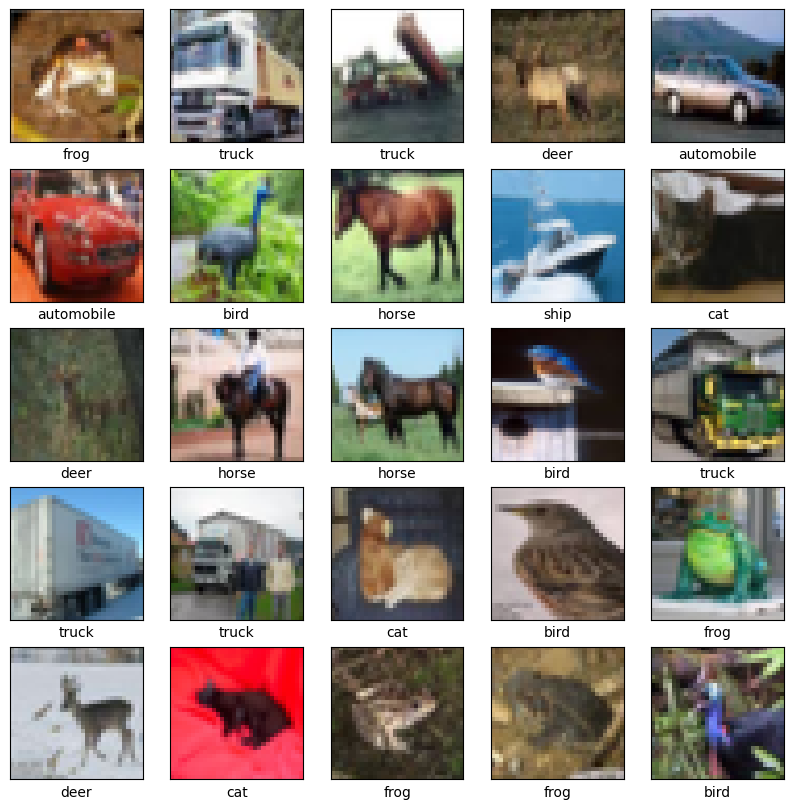

In [52]:
# TODO: Plot some of the images along with their labels
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(classes[train_labels[i][0]])
plt.show()

# Model

## Parameters

In [53]:
# TASK - Hyperparameters
# Fill in the initial values!
# Later, experiment!
#############################


# dropout - Something between 0.0 < dropout_rate < 1.0, think in "tens of percentages" as default
# dropout rate for conv layers
dropout_rate_1 = 0.2
# dropout rate for fully connected layers
dropout_rate_2 = 0.1

# Choose an appropriate batch size for the training!
batch_size = 128

# Choose an appropriate number of epochs
epoch_count = 30

## Network

In [54]:
# adapted from https://github.com/jtopor/CUNY-MSDA-661/blob/master/CIFAR-CNN/TF-Layers-CIFAR-GITHUB-v3.py


tf.compat.v1.reset_default_graph() # It's good practice to clean and reset everything
clear_session()          # even using Keras


# WE USE FUNCTIONAL API!
# (Could be different, but not now...)



# Model
#######

x = Input(shape=(32, 32, 3))

# Convolutional block 1
conv1 = Conv2D(64, (3,3), padding='same', activation='relu')(x)
conv1 = BatchNormalization()(conv1)
conv1 = Conv2D(64, (3,3), padding='same', activation='relu')(conv1)
conv1 = BatchNormalization()(conv1)
pool1 = MaxPooling2D((2,2))(conv1)
dropout1 = Dropout(0.3)(pool1)

# Convolutional block 2
conv2 = Conv2D(128, (3,3), padding='same', activation='relu')(dropout1)
conv2 = BatchNormalization()(conv2)
conv2 = Conv2D(128, (3,3), padding='same', activation='relu')(conv2)
conv2 = BatchNormalization()(conv2)
pool2 = MaxPooling2D((2,2))(conv2)
dropout2 = Dropout(0.4)(pool2)

# Convolutional block 3
conv3 = Conv2D(256, (3,3), padding='same', activation='relu')(dropout2)
conv3 = BatchNormalization()(conv3)
conv3 = Conv2D(256, (3,3), padding='same', activation='relu')(conv3)
conv3 = BatchNormalization()(conv3)
pool3 = MaxPooling2D((2,2))(conv3)
dropout3 = Dropout(0.4)(pool3)

# Flatten and Dense layers
flat = Flatten()(dropout3)
dense1 = Dense(512, activation='relu')(flat)
dense1 = BatchNormalization()(dense1)
dropout4 = Dropout(0.5)(dense1)
predictions = Dense(10, activation='softmax')(dropout4)

model = Model(inputs=x, outputs=predictions)

# Use SGD with momentum or a different optimizer
optimizer = SGD(learning_rate=0.000001, momentum=0.9, nesterov=True)

# Compile the model
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 32, 32, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 32, 32, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 32, 32, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 16, 16, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 16, 16, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 16, 16, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 16, 16, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 8, 8, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 8, 8, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 8, 8, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 8, 8, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 3,253,834 (12.41 MB)

 Trainable params: 3,251,018 (12.40 MB)

 Non-trainable params: 2,816 (11.00 KB)

## Loss, optimization and compilation

In [55]:
# Loss
loss = sparse_categorical_crossentropy # we use this cross entropy variant as the input is not
                                       # one-hot encoded

# Optimizer
# Choose an optimizer - adaptive ones work well here
optimizer = Adam()

# Compilation
#############
model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

## Training

In [56]:
history = model.fit(x=train_images, y=train_labels,
                    validation_data=(valid_images, valid_labels),
                    epochs=epoch_count,
                    batch_size=batch_size)

Epoch 1/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 32s 65ms/step - accuracy: 0.3495 - loss: 2.1665 - val_accuracy: 0.1675 - val_loss: 3.1068
Epoch 2/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 23s 31ms/step - accuracy: 0.5867 - loss: 1.2040 - val_accuracy: 0.6271 - val_loss: 1.0587
Epoch 3/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 32ms/step - accuracy: 0.6806 - loss: 0.9091 - val_accuracy: 0.6998 - val_loss: 0.8762
Epoch 4/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 32ms/step - accuracy: 0.7329 - loss: 0.7609 - val_accuracy: 0.7363 - val_loss: 0.7655
Epoch 5/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step - accuracy: 0.7687 - loss: 0.6561 - val_accuracy: 0.7673 - val_loss: 0.6784
Epoch 6/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 32ms/step - accuracy: 0.7903 - loss: 0.5951 - val_accuracy: 0.7690 - val_loss: 0.6879
Epoch 7/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - accuracy: 0.8128 - loss: 0.5386 - val_accuracy: 0.7581 - val_loss: 0.7437
Epoch 8/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - accuracy: 0.8297 - loss: 0.4883 - 

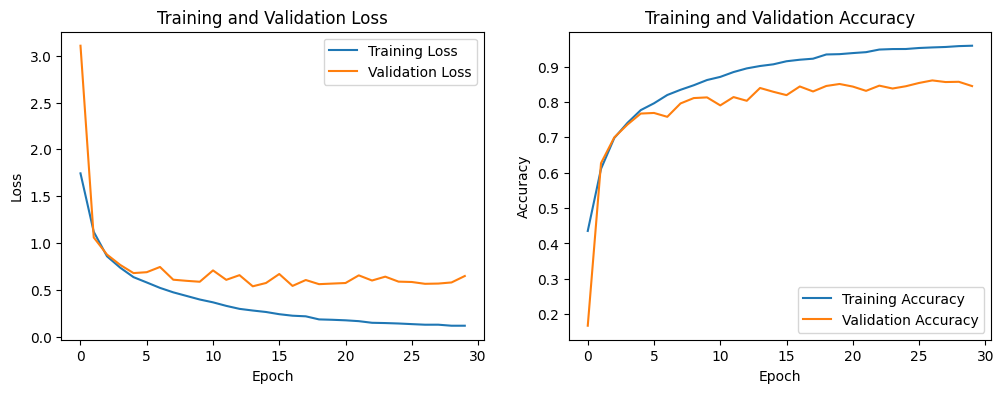

In [57]:
# TODO: Plot loss and accuracy
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [58]:
assert max(history.history['val_accuracy']) > 0.75

## Visualization

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


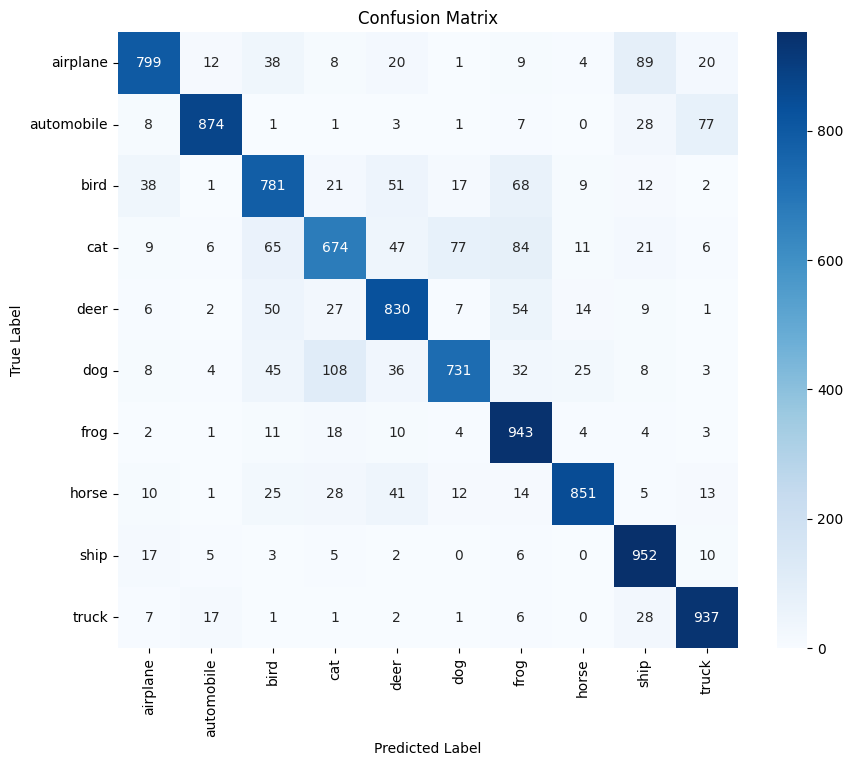

In [59]:
# TODO: Plot Confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Predict classes for the test set
y_pred = model.predict(test_images)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_labels.squeeze()

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Plot confusion matrix using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [60]:
# TODO: Plot Classification Report
from sklearn.metrics import classification_report

# Print classification report
print(classification_report(y_true, y_pred_classes, target_names=classes))

              precision    recall  f1-score   support

    airplane       0.88      0.80      0.84      1000
  automobile       0.95      0.87      0.91      1000
        bird       0.77      0.78      0.77      1000
         cat       0.76      0.67      0.71      1000
        deer       0.80      0.83      0.81      1000
         dog       0.86      0.73      0.79      1000
        frog       0.77      0.94      0.85      1000
       horse       0.93      0.85      0.89      1000
        ship       0.82      0.95      0.88      1000
       truck       0.87      0.94      0.90      1000

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000

